In [1]:
import clip
import matplotlib.pyplot as plt
from PIL import Image

from exclip import Explainer
from exclip.models.tokenization import ClipTokenizer
from exclip.utils import image_utils, plotting

/mount/arbeitsdaten/tcl/Users/moellels/anaconda/envs/xclip/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = 'cuda:3'
model_name = 'ViT-B/16'
model, prep = clip.load(model_name, device=device)
explainer = Explainer(model, device=device)
tokenizer = ClipTokenizer()

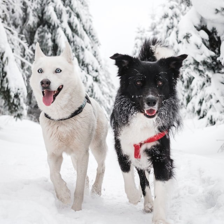

In [3]:
image = Image.open("examples/dogs.jpg")
cropped_image = image_utils.crop(image, resolution=224)
cropped_image

In [4]:
caption = 'A white husky and a black dog running in a snow covered forest.'
tokenizer.print_tokens(caption)

'1-a 2-white 3-husky 4-and 5-a 6-black 7-dog 8-running 9-in 10-a 11-snow 12-covered 13-forest 14-.'

In [5]:
txt_inpt = tokenizer.tokenize(caption).to(device)
img_inpt = prep(image).unsqueeze(0).to(device)

In [7]:
A = explainer.explain(
    txt_inpt, img_inpt, 
    text_layer=11, 
    image_layer=11,  
    N=10,
    cut_txt_padding=True,
    verbose=True,
    compute_lhs_terms=False
)
A.shape

100%|██████████| 512/512 [00:00<00:00, 720.18it/s]


torch.Size([16, 14, 14])

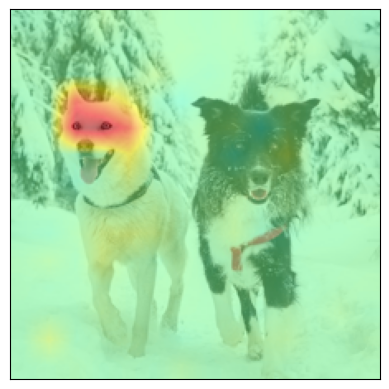

In [8]:
img_attr = A[2:5].sum(dim=0)
heat = plotting.image_attribution_interpolation(
    image=cropped_image,
    A=img_attr,
    alpha=.5
)
plt.imshow(heat)
plt.xticks([])
plt.yticks([])
plt.show()